In [153]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split

dataTrain = pd.read_csv (r'/Users/davidemomi/Desktop/DAVE/summerscholl_viterbo/summerschool/project/dataTrain.csv')
dataTest = pd.read_csv (r'/Users/davidemomi/Desktop/DAVE/summerscholl_viterbo/summerschool/project/dataTest.csv')

In [155]:
X_train  = dataTrain.drop(labels='final_score', axis=1)

X_test = dataTest.drop(labels='final_score', axis=1)

y_train = dataTrain['final_score']

y_test = dataTest['final_score']

print(X_test)

     Unnamed: 0  Unnamed: 0.1  B365A  B365D  B365H        BSA       BSD  \
0             0             0   3.60   3.25   2.15   3.582857  3.180000   
1             1             1   8.00   4.33   1.44   7.535714  4.172857   
2             2             2   2.40   3.20   3.10   2.442857  3.141429   
3             3             3   3.20   3.20   2.38   3.121429  3.175714   
4             4             5   9.00   4.50   1.40   9.417143  4.571429   
5             5             6   5.75   3.60   1.67   5.978571  3.582857   
6             6             7   3.30   3.20   2.30   3.285714  3.124286   
7             7             8   4.50   3.30   1.91   4.401429  3.340000   
8             8             9   3.50   3.20   2.20   3.530000  3.122857   
9             9            10   4.00   3.50   1.95   3.968571  3.351429   
10           10            11   3.40   3.10   2.30   3.224286  3.111429   
11           11            12   5.50   3.60   1.67   5.484286  3.598571   
12           12          

In [170]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

#scaler = MinMaxScaler(feature_range=[0, 1])
#X_train_rescaled = scaler.fit_transform(X_train)
#X_test_rescaled = scaler.fit_transform(X_test)

In [199]:
from sklearn import preprocessing
import pandas as pd

train_set = pd.read_csv (r'/Users/davidemomi/Desktop/DAVE/summerscholl_viterbo/summerschool/project/dataTrain.csv')
test_set = pd.read_csv (r'/Users/davidemomi/Desktop/DAVE/summerscholl_viterbo/summerschool/project/dataTest.csv')


#drops the target column
y_train = train_set.final_score
x_train = train_set.drop(labels='final_score', axis=1)

y_test = test_set.final_score
x_test = test_set.drop(labels='final_score', axis=1)

#MinMax scaler, it does not distort data
mm_scaler = preprocessing.MinMaxScaler()
mm_scaled_x_train = mm_scaler.fit_transform(x_train)
mm_scaled_x_test = mm_scaler.fit_transform(x_test)

#Standard Scaler in case of the normal distribution
std_scaler = preprocessing.StandardScaler()
std_scaled_x_train = std_scaler.fit_transform(x_train)
std_scaled_x_test = std_scaler.fit_transform(x_test)

#Normalization of the data processed by Standard Scaler
normalized_std_train = preprocessing.normalize(std_scaled_x_train)
normalized_std_test = preprocessing.normalize(std_scaled_x_test)

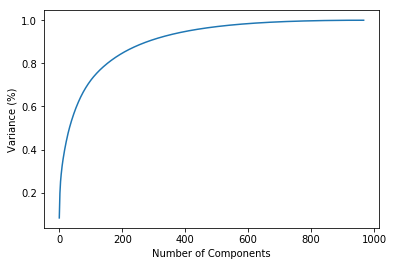

In [200]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_std_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

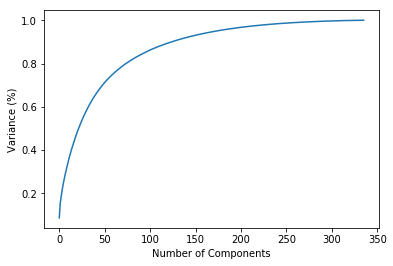

In [201]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_std_test)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [251]:
pca = PCA(n_components=336)
pca_X_train = pca.fit_transform(X_train_rescaled)

In [252]:
pca.n_components_
pca_X_train.shape

(1946, 336)

In [253]:
pca = PCA(n_components=336)
pca_X_test = pca.fit_transform(X_test_rescaled)

In [254]:
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
import warnings

warnings.simplefilter("ignore")

In [255]:
## Initializing all models and parameters
#Initializing classifiers
RF_clf = RandomForestClassifier(n_estimators = 200, random_state = 1, class_weight = 'balanced')
AB_clf = AdaBoostClassifier(n_estimators = 200, random_state = 2)
GNB_clf = GaussianNB()
KNN_clf =  KNeighborsClassifier()
LOG_clf = linear_model.LogisticRegression(multi_class = "ovr", solver = "sag", class_weight = 'balanced')
clfs = [RF_clf, AB_clf, GNB_clf, KNN_clf, LOG_clf]

#Specficying scorer and parameters for grid search
feature_len = X_test.shape[1]
scorer = make_scorer(accuracy_score)
parameters_RF = {'clf__max_features': ['auto', 'log2'], 
                 'dm_reduce__n_components': np.arange(5, feature_len, np.around(feature_len/5))}
parameters_AB = {'clf__learning_rate': np.linspace(0.5, 2, 5), 
                 'dm_reduce__n_components': np.arange(5, feature_len, np.around(feature_len/5))}
parameters_GNB = {'dm_reduce__n_components': np.arange(5, feature_len, np.around(feature_len/5))}
parameters_KNN = {'clf__n_neighbors': [3, 5, 10], 
                  'dm_reduce__n_components': np.arange(5, feature_len, np.around(feature_len/5))}
parameters_LOG = {'clf__C': np.logspace(1, 1000, 5), 
                  'dm_reduce__n_components': np.arange(5, feature_len, np.around(feature_len/5))}

parameters = {clfs[0]: parameters_RF,
              clfs[1]: parameters_AB,
              clfs[2]: parameters_GNB,
              clfs[3]: parameters_KNN,
              clfs[4]: parameters_LOG}



In [256]:
clf= RF_clf
clf.fit(pca_X_train, y_train)
print("Score of {} for training set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_train, clf.predict(pca_X_train))))
print("Score of {} for test set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_test, clf.predict(pca_X_test))))

Score of RandomForestClassifier for training set: 1.0000.
Score of RandomForestClassifier for test set: 0.4673.


In [257]:
clf= AB_clf
clf.fit(pca_X_train, y_train)
print("Score of {} for training set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_train, clf.predict(pca_X_train))))
print("Score of {} for test set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_test, clf.predict(pca_X_test))))

Score of AdaBoostClassifier for training set: 0.7395.
Score of AdaBoostClassifier for test set: 0.3839.


In [258]:
clf= GNB_clf
clf.fit(pca_X_train, y_train)
print("Score of {} for training set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_train, clf.predict(pca_X_train))))
print("Score of {} for test set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_test, clf.predict(pca_X_test))))

Score of GaussianNB for training set: 0.6850.
Score of GaussianNB for test set: 0.3423.


In [259]:
clf= KNN_clf
clf.fit(pca_X_train, y_train)
print("Score of {} for training set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_train, clf.predict(pca_X_train))))
print("Score of {} for test set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_test, clf.predict(pca_X_test))))

Score of KNeighborsClassifier for training set: 0.6187.
Score of KNeighborsClassifier for test set: 0.3899.


In [260]:
clf= LOG_clf
clf.fit(pca_X_train, y_train)
print("Score of {} for training set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_train, clf.predict(pca_X_train))))
print("Score of {} for test set: {:.4f}.".format(clf.__class__.__name__, accuracy_score(y_test, clf.predict(pca_X_test))))

Score of LogisticRegression for training set: 0.6285.
Score of LogisticRegression for test set: 0.3363.
